#Processing of the MQ sensors' logs

In this **project**, we'll build a neural network and use it to predict food degradation over time.

In [29]:
#Importing modules
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load and prepare the data

A critical step in working with neural networks is preparing the data correctly.

In [30]:
data_path = 'mq_sensors_logs_feta.csv'

df_feta = pd.read_csv(data_path)
# Watch all columns
pd.options.display.max_columns = None

# Add value 0 for first day and 1 for rest.
df_feta.loc[0:1440, 'day'] = 0
df_feta.loc[1440:, 'day'] = 1

#rides_feta.head(10)
print(df_feta[1435:1445])

      Timestamp  Raw_value_MQ2  Raw_value_MQ3  Raw_value_MQ4  Raw_value_MQ135  \
1435       1442         1728.0         3264.0         1088.0           1152.0   
1436       1443         1728.0         3008.0         1088.0           1152.0   
1437       1444         1728.0         2944.0         1088.0           1152.0   
1438       1445         1728.0         2752.0         1088.0           1152.0   
1439       1446         1728.0         3328.0         1088.0           1152.0   
1440       1447         1728.0         2880.0         1088.0           1152.0   
1441       1448         1728.0         3136.0         1088.0           1152.0   
1442       1449         1728.0         2688.0         1088.0           1152.0   
1443       1450         1728.0         2944.0         1088.0           1152.0   
1444       1451         1728.0         2918.4         1088.0           1152.0   

      Raw_value_MQ6  Raw_value_MQ7  Raw_value_MQ8  Raw_value_MQ9      day  
1435         1216.0         1792

##Checking out the data
This dataset has logs from various different simple air sensors that are collected during food degradation over a period of time. Logs are collected in intervals of 1 minute so for one day we have 1440 entries. Check the basic set up for the [MQ-2 sensor](https://medium.com/p/5c7e2338267f) and the whole [bunch of air sensors](https://medium.com/p/b4523540f63d).

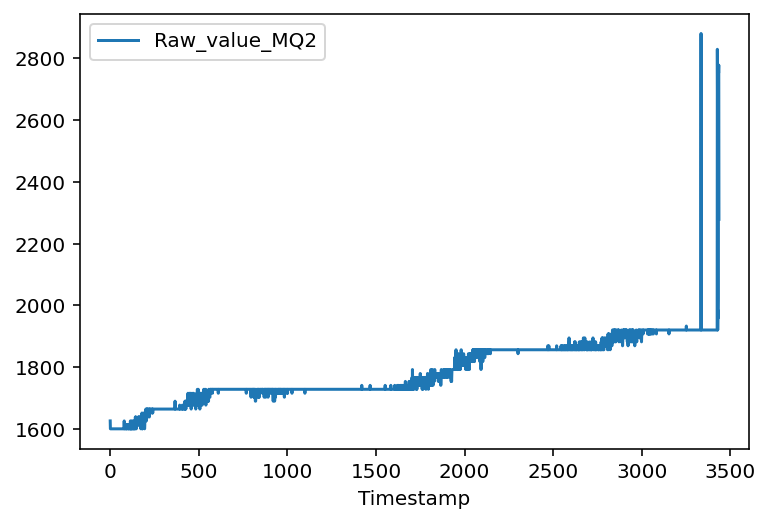

In [31]:
df_feta[:3500].plot(x='Timestamp', y='Raw_value_MQ2')

##Normalizing the values
We are dividing every log by 65472 wich is the maximum value each sensor can give. For more info read [this](https://github.com/adafruit/Adafruit_CircuitPython_MCP3xxx/blob/main/adafruit_mcp3xxx/analog_in.py#L50-L54).

In [32]:
sensor_names = ['Raw_value_MQ2', 'Raw_value_MQ3', 'Raw_value_MQ4', 'Raw_value_MQ135', 'Raw_value_MQ6', 'Raw_value_MQ7', 'Raw_value_MQ8', 'Raw_value_MQ9']
sensor_names_with_day = ['Raw_value_MQ2', 'Raw_value_MQ3', 'Raw_value_MQ4', 'Raw_value_MQ135', 'Raw_value_MQ6', 'Raw_value_MQ7', 'Raw_value_MQ8', 'Raw_value_MQ9', 'day']

MAX_VALUE = 65472
for each in sensor_names:
    df_feta.loc[:, each] = df_feta[each] / MAX_VALUE

df_feta[:10]

,Timestamp,Raw_value_MQ2,Raw_value_MQ3,Raw_value_MQ4,Raw_value_MQ135,Raw_value_MQ6,Raw_value_MQ7,Raw_value_MQ8,Raw_value_MQ9,,day
0,0,0.024829,0.098729,0.01564,0.017595,0.018573,0.028348,0.025415,0.019550,NaN,0.0
1,1,0.024438,0.087977,0.01564,0.017595,0.018573,0.028348,0.025415,0.019550,NaN,0.0
2,2,0.024438,0.090714,0.01564,0.017400,0.018573,0.028348,0.025611,0.019550,NaN,0.0
3,3,0.024438,0.080352,0.01564,0.017595,0.018573,0.028348,0.025806,0.018768,NaN,0.0
4,4,0.024438,0.077419,0.01564,0.017595,0.018573,0.028543,0.026197,0.019159,NaN,0.0
5,5,0.024438,0.084066,0.01564,0.017400,0.018573,0.028348,0.026393,0.018573,NaN,0.0
6,6,0.024438,0.089932,0.01564,0.017400,0.018573,0.028348,0.026002,0.018573,NaN,0.0
7,7,0.024438,0.102639,0.01564,0.017400,0.018573,0.028348,0.026393,0.019550,NaN,0.0
8,8,0.024438,0.091691,0.01564,0.017400,0.018573,0.028348,0.026197,0.018964,NaN,0.0
9,9,0.024438,0.095015,0.01564,0.017595,0.018573,0.028348,0.026393,0.019550,NaN,0.0


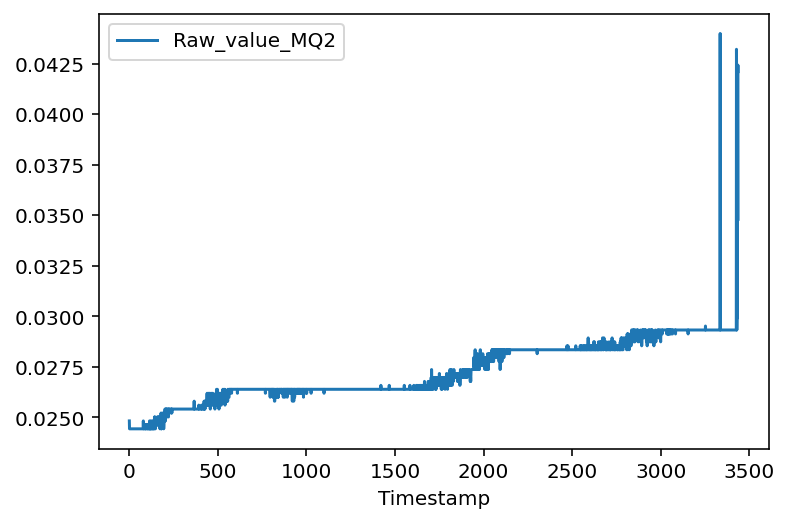

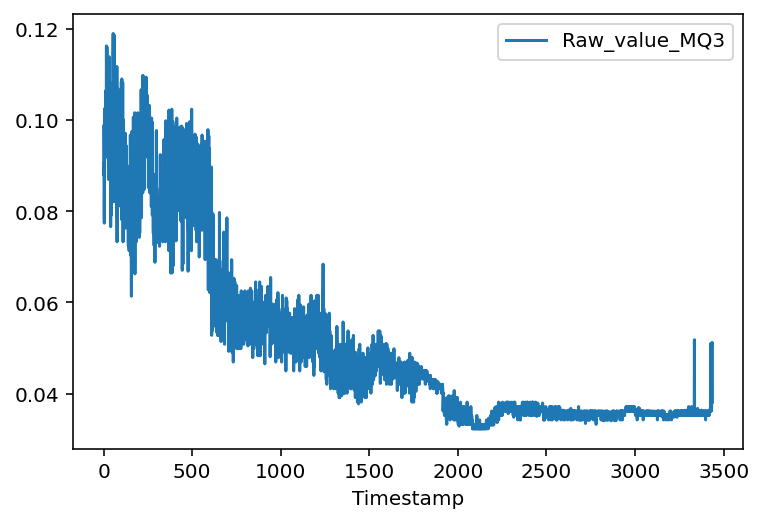

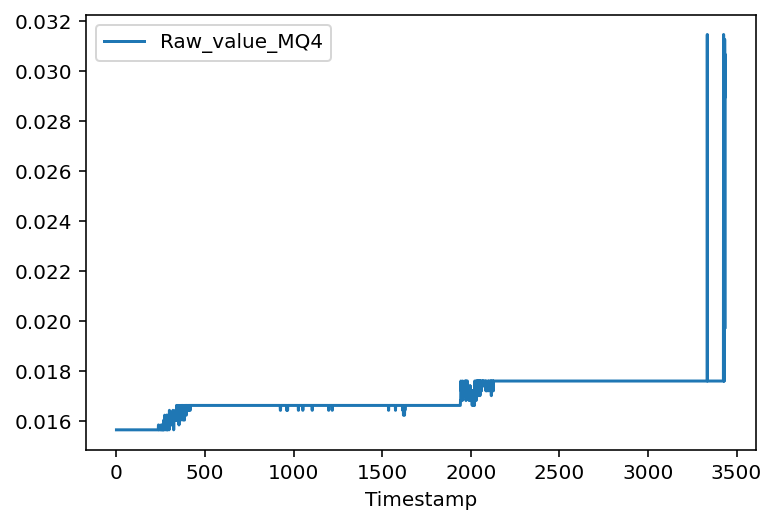

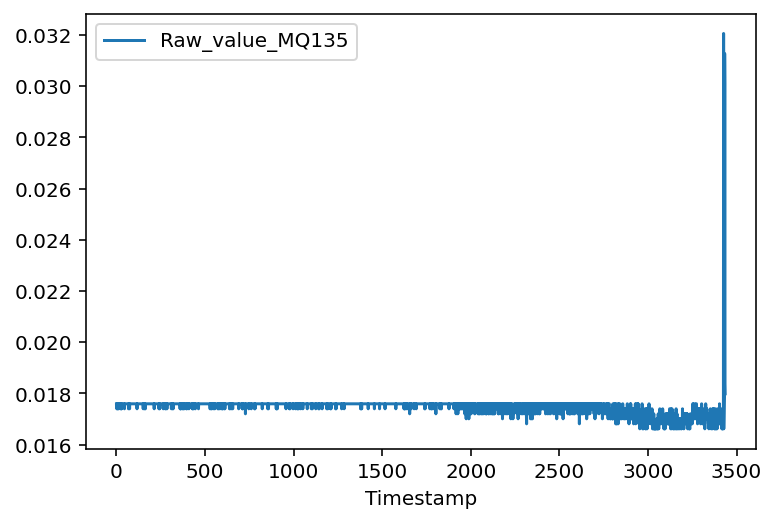

In [33]:
#Plot the diagram with normalized data
df_feta[:3500].plot(x='Timestamp', y='Raw_value_MQ2')
df_feta[:3500].plot(x='Timestamp', y='Raw_value_MQ3')
df_feta[:3500].plot(x='Timestamp', y='Raw_value_MQ4')
df_feta[:3500].plot(x='Timestamp', y='Raw_value_MQ135')

In [34]:
fields = df_feta[sensor_names_with_day]

In [35]:
#Print a dataframe with normalized values and the day
fields[1438:1450]

,Raw_value_MQ2,Raw_value_MQ3,Raw_value_MQ4,Raw_value_MQ135,Raw_value_MQ6,Raw_value_MQ7,Raw_value_MQ8,Raw_value_MQ9,day
1438,0.026393,0.042033,0.016618,0.017595,0.018573,0.02737,0.026002,0.018573,0.0
1439,0.026393,0.050831,0.016618,0.017595,0.018573,0.02737,0.026393,0.018573,0.0
1440,0.026393,0.043988,0.016618,0.017595,0.018573,0.02737,0.026197,0.018573,1.0
1441,0.026393,0.047898,0.016618,0.017595,0.018573,0.02737,0.026002,0.018573,1.0
1442,0.026393,0.041056,0.016618,0.017595,0.018573,0.02737,0.026002,0.018573,1.0
1443,0.026393,0.044966,0.016618,0.017595,0.018573,0.02737,0.026002,0.018573,1.0
1444,0.026393,0.044575,0.016618,0.017595,0.018573,0.02737,0.026197,0.018573,1.0
1445,0.026393,0.045161,0.016618,0.017595,0.018573,0.02737,0.026002,0.018573,1.0
1446,0.026393,0.044966,0.016618,0.017595,0.018573,0.02737,0.026002,0.018573,1.0
1447,0.026393,0.038123,0.016618,0.017595,0.018573,0.02737,0.026002,0.018573,1.0


### Splitting the data into training, testing, and validation sets

We'll save the data for the first 50 minutes of each day as test set and split the rest as training and validation sets.

In [36]:
# Test data for 100 minutes
test_data_first_day = fields[0:50]
test_data_second_day = fields[1440:1490]
test_data_two_days = [test_data_first_day, test_data_second_day]
# we DO NOT shuffle the test set
test_data = pd.concat(test_data_two_days)


# Now remove the test data from the data set (USE VALUES UNTIL 3000 ENTRIES)
data_first_day = fields[50:1440]
data_second_day = fields[1490:3000]
data_two_days = [data_first_day, data_second_day]
data_rest = pd.concat(data_two_days)
# SHUFFLE the dataset before splitting into training and validation and reset the index
data_rest = data_rest.sample(frac=1).reset_index(drop=True)
print(data_rest[:10])

# Separate the data into features and targets
target_field = ['day']
data_features, data_targets = data_rest.drop(target_field, axis=1), data_rest[target_field]
test_features, test_targets = test_data.drop(target_field, axis=1), test_data[target_field]


   Raw_value_MQ2  Raw_value_MQ3  Raw_value_MQ4  Raw_value_MQ135  \
0       0.029130       0.036168       0.017595         0.016813   
1       0.026393       0.055718       0.016618         0.017595   
2       0.025415       0.082111       0.015640         0.017595   
3       0.028348       0.032258       0.017595         0.017400   
4       0.026002       0.090518       0.016618         0.017595   
5       0.028348       0.037146       0.017595         0.017595   
6       0.025415       0.089932       0.016422         0.017595   
7       0.024438       0.100098       0.015640         0.017595   
8       0.026393       0.050831       0.016618         0.017595   
9       0.028935       0.036168       0.017595         0.017595   

   Raw_value_MQ6  Raw_value_MQ7  Raw_value_MQ8  Raw_value_MQ9  day  
0       0.018573       0.026393       0.025415       0.017791  1.0  
1       0.018573       0.027370       0.025806       0.018573  0.0  
2       0.018573       0.028348       0.026393       0.

In [37]:
# Create test features list.
test_features_list=[]

for row in test_features.iterrows():
    index, data = row
    test_features_list.append(data.tolist())

# Create test targets list.
test_targets_list=[]

for row in test_targets.iterrows():
    index, data = row
    test_targets_list.append(data.tolist())


# Create data features list.
data_features_list=[]

for row in data_features.iterrows():
    index, data = row
    data_features_list.append(data.tolist())

# Create data targets list.
data_targets_list=[]

for row in data_targets.iterrows():
    index, data = row
    data_targets_list.append(data.tolist())

In [10]:
'''
print(data_features_list[:10])
print(data_targets_list[:10])
print(len(data_targets_list))
'''

'\nprint(data_features_list[:10])\nprint(data_targets_list[:10])\nprint(len(data_targets_list))\n'

In [38]:
# Split into training and validation data
# Hold out the last 500 entries or so of the remaining data as a validation set
train_features, train_targets = np.array(data_features_list[:2400]), np.array(data_targets_list[:2400])
val_features, val_targets = np.array(data_features_list[2400:]), np.array(data_targets_list[2400:])
test_features, test_targets = np.array(test_features_list[:]), np.array(test_targets_list[:])

In [12]:
'''
print(len(train_features))
print(len(train_targets))


print(len(val_features))
print(len(val_targets))
'''

'\nprint(len(train_features))\nprint(len(train_targets))\n\n\nprint(len(val_features))\nprint(len(val_targets))\n'

In [39]:
# Convert targets to categorical
import tensorflow as tf

train_targets_categorical = tf.keras.utils.to_categorical(train_targets, dtype ="uint8")
val_targets_categorical = tf.keras.utils.to_categorical(val_targets, dtype ="uint8")
test_targets_categorical = tf.keras.utils.to_categorical(test_targets, dtype ="uint8")

In [40]:
print(test_targets_categorical[48:53])

[[1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]]


##Build a Keras model to train the dataset.

In [41]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

model=Sequential()
model.add(Dense(256, input_dim=8,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               2304      
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 2)                

In [42]:
from tensorflow.keras.optimizers import Adam


adam = Adam(learning_rate=0.000001)
# https://keras.io/api/losses/probabilistic_losses/#categorical_crossentropy-function
model.compile(loss='categorical_crossentropy', 
             optimizer=adam, 
             metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint  

batch_size = 50
num_epochs = 500

checkpoint = ModelCheckpoint(filepath='food_quality.weights.best.h5', verbose=1, 
                               save_best_only=True)

callbacks_list = [checkpoint]

history = model.fit(train_features, train_targets_categorical, validation_data=(val_features, val_targets_categorical), batch_size=batch_size, epochs=num_epochs, callbacks=callbacks_list)

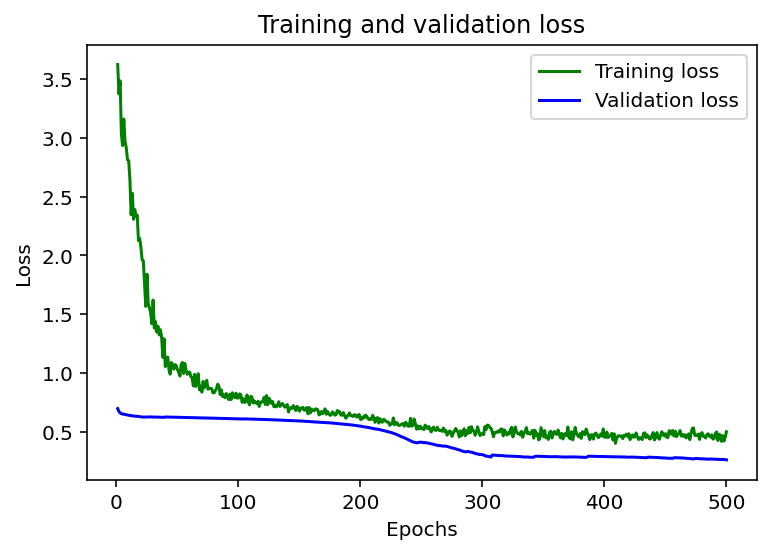

In [53]:
#Get history
history_dict = history.history
history_dict.keys()

#dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "g" is for "solid green line"
plt.plot(epochs, loss, 'g', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [45]:
#Evaluate model with the test set
print(len(test_features))
scores = model.evaluate(test_features, test_targets_categorical, verbose=1)

100
4/4 [==============================] - 0s 4ms/step - loss: 0.2362 - accuracy: 0.9800


In [47]:
#Predict an output with one entry
test_features = np.array(test_features_list[52])
test_features = np.expand_dims(test_features, axis=0)
print(test_features)
score = model.predict(test_features, verbose=1)
print(score)
##Show the argmax label
print(tf.math.argmax(score[0]))

[[0.02639296 0.04105572 0.01661779 0.01759531 0.01857283 0.02737048
  0.02600196 0.01857283]]
1/1 [==============================] - 0s 27ms/step
[[0.00262858 0.00706801]]
tf.Tensor(1, shape=(), dtype=int64)


##Reconstruct a new model from the .h5 format

In [48]:
reconstructed_model = keras.models.load_model("/content/food_quality.weights.best.h5")

In [49]:
#Evaluate the reconstructed model with an entry from the test set
score = reconstructed_model.predict(test_features, verbose=1)
print(score)
print(tf.math.argmax(score[0]))

1/1 [==============================] - 0s 69ms/step
[[0.00262858 0.00706801]]
tf.Tensor(1, shape=(), dtype=int64)


In [50]:
#Save the model to the saved model format
reconstructed_model.save('/content/saved_model')

INFO:tensorflow:Assets written to: /content/saved_model/assets


INFO:tensorflow:Assets written to: /content/saved_model/assets


##Convert to tflite

In [51]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('/content/saved_model') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('food_model.tflite', 'wb') as f:
  f.write(tflite_model)

In [52]:
# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/content/food_model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors details.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)
print(output_details)

interpreter.set_tensor(input_details[0]['index'], tf.cast(test_features, tf.float32))

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[{'name': 'serving_default_dense_8_input:0', 'index': 0, 'shape': array([1, 8], dtype=int32), 'shape_signature': array([-1,  8], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 12, 'shape': array([1, 2], dtype=int32), 'shape_signature': array([-1,  2], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[[0.00262858 0.00706801]]
